In [26]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint
import os
import time
import prepare
import json
import wrangle
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
import re

import unicodedata
import nltk
from wordcloud import WordCloud

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
["Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0",
  "Mozilla/5.0 (Windows NT 10.0; rv:78.0) Gecko/20100101 Firefox/78.0",
  "Mozilla/5.0 (X11; Linux x86_64; rv:95.0) Gecko/20100101 Firefox/95.0"]

In [7]:
headers = {"User-Agent": "look at the stars"}



url = 'https://github.com/search?o=desc&q=stars%3A%3E1&s=forks&type=Repositories&p=6'
response = get(url, headers = headers)
response

<Response [429]>

In [25]:
print(response.text)




<!DOCTYPE html>
<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"  data-a11y-animated-images="system">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">
  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>
  <link rel="preconnect" href="https://avatars.githubusercontent.com">

  

  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-4569ff6a5326.css" /><link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/dark-34efc528590d.css" /><link data-color-theme="dark_dimmed" crossorigin="anonymous" media="all" rel="stylesheet" data-href="https://github.g

In [43]:
soup = BeautifulSoup(response.content, 'html.parser')
soup.find_all('a', class_ = 'v-align-middle')[0]['href']
soup.find_all('a', class_ = 'next_page')

[<a class="next_page" href="/search?o=desc&amp;p=7&amp;q=stars%3A%3E1&amp;s=forks&amp;type=Repositories" rel="next">Next</a>]

In [27]:
url = 'https://github.com/search?q=healthcare&type=repositories'
headers = {"User-Agent": "budda statue"}
the_list_of_endings = []
for j in range(30):
    time.sleep(30)
    response = get(url, headers = headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    

    for i in soup.find_all('a', class_ = 'v-align-middle'):
        the_list_of_endings.append(i['href'])
    print('\n\n\n')
    

    url = 'https://github.com' + soup.find_all('a', class_ = 'next_page')[0]['href']

In [34]:
pd.DataFrame(the_list_of_endings).to_csv('the_list_of_300')

In [36]:
test_df = pd.read_csv('the_list_of_300')
test_df

Unnamed: 0                                            0
0             0                         /Project-MONAI/MONAI
1             1              /GoogleCloudPlatform/healthcare
2             2                   /kakoni/awesome-healthcare
3             3         /wanghaisheng/healthcaredatastandard
4             4              /HealthCatalyst/healthcareai-py
..          ...                                          ...
295         295                    /asdsyd/Healthy-developer
296         296   /zzak00/Disease-Symptom-Prediction-Chatbot
297         297                       /FreeHealth/freehealth
298         298                              /CDCgov/phoenix
299         299  /microsoft/vscode-azurehealthcareapis-tools

[300 rows x 2 columns]

In [11]:
# Open the file in read mode
with open('data2.json', 'r') as file:
    # Load the contents of the file into a dictionary
    readme_data = json.load(file)
# Now you can access the contents of the JSON file through the `data` variable
    codeup_df = pd.DataFrame(readme_data)

In [12]:
codeup_df

repo          language  \
0                                 Project-MONAI/MONAI            Python   
1                      GoogleCloudPlatform/healthcare  Jupyter Notebook   
2                           kakoni/awesome-healthcare              None   
3                 wanghaisheng/healthcaredatastandard              None   
4                      HealthCatalyst/healthcareai-py            Python   
5                  microsoft/HealthBotContainerSample        JavaScript   
6                               isaacmg/healthcare_ml              None   
7                 TheAlphamerc/flutter_healthcare_app              Dart   
8                           nextgenhealthcare/connect              Java   
9                                OCA/vertical-medical              None   
10                      HealthCatalyst/healthcareai-r                 R   
11                    acoravos/healthcare-blockchains              None   
12                      itachi9604/healthcare-chatbot            Python   
13  prasadseemakurthi/Deep-Neural-Networks-HealthCare            Python   
14              pratik008/HealthCare_Twitter_Analysis            Python   
15                        MoH-Malaysia/covid19-public  Jupyter Notebook   
16                       DataKind-SG/healthcare_ASEAN  Jupyter Notebook   
17                       llSourcell/AI_for_healthcare  Jupyter Notebook   
18                                sunlabuiuc/PyHealth            Python   
19       llSourcell/How_to_Build_a_healthcare_startup              Dart   

                                      readme_contents  
0   <p align="center">\n  <img src="https://raw.gi...  
1   # Cloud Healthcare\n\nThis respository contain...  
2   # Awesome Health [![Awesome](https://cdn.jsdel...  
3   healthcaredatastandard\n======================...  
4   # healthcareai\n\n[![Code Health](https://land...  
5   # Health Bot Container\n\nA simple web page th...  
6   ## Table Of Contents\n- [Machine Learning for ...  
7   ## flutter_healthcare_app ![Twitter URL](https...  
8   # Mirth® Connect by NextGen Healthcare\n\n1. [...  
9   \n[![Runboat](https://img.shields.io/badge/run...  
10  ---\noutput: github_document\n---\n\n<!-- READ...  
11  _UPDATE: As of July 25, 2018, we have combined...  
12  # healthcare-chatbot\na chatbot based on sklea...  
13  # Deep Learning in Healthcare and Computationa...  
14  # Twitter-Healthcare-Analysis\n\nI have writte...  
15  # Open data on COVID-19 in Malaysia\n\n**The s...  
16  healthcare_ASEAN\n============================...  
17  # ChemGAN challenge\n\n\n## Overview\n\nThis i...  
18  Welcome to PyHealth!\n========================...  
19  \n\n\n## Overview\n\nThis is the code for [thi...

In [2]:
def do_everything(codeup_df):
    cleaned_original = codeup_df['readme_contents'].apply(prepare.basic_clean)
    codeup_df['clean'] = cleaned_original
    tokenized_original = codeup_df['clean'].apply(prepare.tokenize)
    codeup_df['clean'] = tokenized_original

    codeup_df['clean'] = codeup_df['clean'].apply(prepare.remove_stopwords, extra_words = [], exclude_words = [])



    codeup_df['stemmed'] = codeup_df['clean'].apply(prepare.stem)
    codeup_df['lemmatized'] = codeup_df['clean'].apply(prepare.lemmatize)
    return codeup_df

In [34]:
pd.set_option("display.max_colwidth", None)

In [ ]:
codeup_df

repo          language  \
0                                 Project-MONAI/MONAI            Python   
1                      GoogleCloudPlatform/healthcare  Jupyter Notebook   
2                           kakoni/awesome-healthcare              None   
3                 wanghaisheng/healthcaredatastandard              None   
4                      HealthCatalyst/healthcareai-py            Python   
5                  microsoft/HealthBotContainerSample        JavaScript   
6                               isaacmg/healthcare_ml              None   
7                 TheAlphamerc/flutter_healthcare_app              Dart   
8                           nextgenhealthcare/connect              Java   
9                                OCA/vertical-medical              None   
10                      HealthCatalyst/healthcareai-r                 R   
11                    acoravos/healthcare-blockchains              None   
12                      itachi9604/healthcare-chatbot            Python   
13  prasadseemakurthi/Deep-Neural-Networks-HealthCare            Python   
14              pratik008/HealthCare_Twitter_Analysis            Python   
15                        MoH-Malaysia/covid19-public  Jupyter Notebook   
16                       DataKind-SG/healthcare_ASEAN  Jupyter Notebook   
17                       llSourcell/AI_for_healthcare  Jupyter Notebook   
18                                sunlabuiuc/PyHealth            Python   
19       llSourcell/How_to_Build_a_healthcare_startup              Dart   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [29]:
import json

# Define the paths to the JSON files
file1_path = 'first5_data.json'
file2_path = 'second.json'
file3_path = 'third.json'


with open(file1_path, 'r') as f:
    data = json.load(f)
    df1 = pd.DataFrame(data)


with open(file2_path, 'r') as f:
    data = json.load(f)
    
    df2 = pd.DataFrame(data)    


with open(file3_path, 'r') as f:
    data = json.load(f)
    
    df3 = pd.DataFrame(data)

    
giant_df = pd.concat([df1, df2, df3], axis=0)

giant_df.to_csv('giant_df')
giant_df


repo          language  \
0                                 Project-MONAI/MONAI            Python   
1                      GoogleCloudPlatform/healthcare  Jupyter Notebook   
2                           kakoni/awesome-healthcare              None   
3                 wanghaisheng/healthcaredatastandard              None   
4                      HealthCatalyst/healthcareai-py            Python   
5                  microsoft/HealthBotContainerSample        JavaScript   
6                               isaacmg/healthcare_ml              None   
7                 TheAlphamerc/flutter_healthcare_app              Dart   
8                           nextgenhealthcare/connect              Java   
9                                OCA/vertical-medical              None   
10                      HealthCatalyst/healthcareai-r                 R   
11                    acoravos/healthcare-blockchains              None   
12                      itachi9604/healthcare-chatbot            Python   
13  prasadseemakurthi/Deep-Neural-Networks-HealthCare            Python   
14              pratik008/HealthCare_Twitter_Analysis            Python   
15                        MoH-Malaysia/covid19-public  Jupyter Notebook   
16                       DataKind-SG/healthcare_ASEAN  Jupyter Notebook   
17                       llSourcell/AI_for_healthcare  Jupyter Notebook   
18                                sunlabuiuc/PyHealth            Python   
19       llSourcell/How_to_Build_a_healthcare_startup              Dart   
20  GoogleCloudPlatform/healthcare-data-harmonization                Go   
21              vsharathchandra/AI-Healthcare-chatbot            Python   
22            Rishabh42/HealthCare-Insurance-Ethereum        JavaScript   
23  PacktPublishing/Machine-Learning-for-Healthcar...              HTML   
24  GoogleCloudPlatform/healthcare-dicom-dicomweb-...              Java   
25                     newmediamedicine/CollaboRhythm      ActionScript   
26                            neee/healthcare-service              Java   
27                                openhealthcare/opal        JavaScript   
28      SoumyaRSethi/Data-Science-Capstone-Healthcare  Jupyter Notebook   
29                    pramodramdas/digital_healthcare        JavaScript   
30                           loutfialiluch/HealthCare              Java   
31                  grfiv/healthcare_twitter_analysis  Jupyter Notebook   
32            instamed/healthcare-payments-blockchain        TypeScript   
33               sarveshraj/blockchain-for-healthcare        JavaScript   
34                   STRML/Healthcare.gov-Marketplace        JavaScript   
35                     medtorch/awesome-healthcare-ai              None   
36                    microsoft/InnerEye-DeepLearning            Python   
37  Project-Based-Learning-IT/healthcare-appointme...        JavaScript   
38              edaaydinea/AI-Projects-for-Healthcare  Jupyter Notebook   
39                         IBMStreams/streamsx.health              Java   
40                  vanderschaarlab/mlforhealthlabpub            Python   
41            MichaelAllen1966/1804_python_healthcare  Jupyter Notebook   
42               IBM-MIL/IBM-Ready-App-for-Healthcare       Objective-C   
43                     qgzang/ComputationalHealthcare            Python   
44             microsoft/healthcare-shared-components                C#   
45                     bluehalo/node-fhir-server-core        JavaScript   
46                   CMSgov/HealthCare.gov-Styleguide               CSS   
47                                    medplum/medplum        TypeScript   
48                 nickls/awesome-healthcare-datasets              None   
49             Conservatory/healthcare.gov-2013-10-01               CSS   
0                 AileenNielsen/OReillyHealthcareData  Jupyter Notebook   
1                            informatici/openhospital          Makefile   
2                                     coronasafe/care            Python   

In [43]:
# Create an empty dictionary to store the merged data
merged_data = {}
# List of JSON files to be merged

# Read each JSON file and merge the data
for file in json_files:
  with open(file, 'r') as f:
    data = json.load(f)
    merged_data.update(data)
# Save the merged data into a new JSON file
with open('merged_data.json', 'w') as f:
  json.dump(merged_data, f)

ValueError: dictionary update sequence element #0 has length 3; 2 is required

In [5]:
import pandas as pd
import numpy as np

#see the data
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#play with words
import nltk
import re
from pprint import pprint

#split and model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



In [30]:

giant_df = do_everything(giant_df)
giant_df

repo          language  \
0                                 Project-MONAI/MONAI            Python   
1                      GoogleCloudPlatform/healthcare  Jupyter Notebook   
2                           kakoni/awesome-healthcare              None   
3                 wanghaisheng/healthcaredatastandard              None   
4                      HealthCatalyst/healthcareai-py            Python   
5                  microsoft/HealthBotContainerSample        JavaScript   
6                               isaacmg/healthcare_ml              None   
7                 TheAlphamerc/flutter_healthcare_app              Dart   
8                           nextgenhealthcare/connect              Java   
9                                OCA/vertical-medical              None   
10                      HealthCatalyst/healthcareai-r                 R   
11                    acoravos/healthcare-blockchains              None   
12                      itachi9604/healthcare-chatbot            Python   
13  prasadseemakurthi/Deep-Neural-Networks-HealthCare            Python   
14              pratik008/HealthCare_Twitter_Analysis            Python   
15                        MoH-Malaysia/covid19-public  Jupyter Notebook   
16                       DataKind-SG/healthcare_ASEAN  Jupyter Notebook   
17                       llSourcell/AI_for_healthcare  Jupyter Notebook   
18                                sunlabuiuc/PyHealth            Python   
19       llSourcell/How_to_Build_a_healthcare_startup              Dart   
20  GoogleCloudPlatform/healthcare-data-harmonization                Go   
21              vsharathchandra/AI-Healthcare-chatbot            Python   
22            Rishabh42/HealthCare-Insurance-Ethereum        JavaScript   
23  PacktPublishing/Machine-Learning-for-Healthcar...              HTML   
24  GoogleCloudPlatform/healthcare-dicom-dicomweb-...              Java   
25                     newmediamedicine/CollaboRhythm      ActionScript   
26                            neee/healthcare-service              Java   
27                                openhealthcare/opal        JavaScript   
28      SoumyaRSethi/Data-Science-Capstone-Healthcare  Jupyter Notebook   
29                    pramodramdas/digital_healthcare        JavaScript   
30                           loutfialiluch/HealthCare              Java   
31                  grfiv/healthcare_twitter_analysis  Jupyter Notebook   
32            instamed/healthcare-payments-blockchain        TypeScript   
33               sarveshraj/blockchain-for-healthcare        JavaScript   
34                   STRML/Healthcare.gov-Marketplace        JavaScript   
35                     medtorch/awesome-healthcare-ai              None   
36                    microsoft/InnerEye-DeepLearning            Python   
37  Project-Based-Learning-IT/healthcare-appointme...        JavaScript   
38              edaaydinea/AI-Projects-for-Healthcare  Jupyter Notebook   
39                         IBMStreams/streamsx.health              Java   
40                  vanderschaarlab/mlforhealthlabpub            Python   
41            MichaelAllen1966/1804_python_healthcare  Jupyter Notebook   
42               IBM-MIL/IBM-Ready-App-for-Healthcare       Objective-C   
43                     qgzang/ComputationalHealthcare            Python   
44             microsoft/healthcare-shared-components                C#   
45                     bluehalo/node-fhir-server-core        JavaScript   
46                   CMSgov/HealthCare.gov-Styleguide               CSS   
47                                    medplum/medplum        TypeScript   
48                 nickls/awesome-healthcare-datasets              None   
49             Conservatory/healthcare.gov-2013-10-01               CSS   
0                 AileenNielsen/OReillyHealthcareData  Jupyter Notebook   
1                            informatici/openhospital          Makefile   
2                                     coronasafe/care            Python   

In [11]:
pd.set_option('display.max_rows', None)


In [13]:
giant_df.drop_duplicates(subset='readme_contents', inplace=True)

In [15]:
len(giant_df.index)

138

In [31]:

new_df = giant_df.reset_index(drop=True)

In [35]:

new_df.drop_duplicates(subset='readme_contents', inplace=True)

In [38]:
new_df = new_df.reset_index(drop=True)

In [40]:
len(new_df.index)

138

In [45]:
new_df.language

0                Python
1      Jupyter Notebook
2                  None
3                  None
4                Python
5            JavaScript
6                  None
7                  Dart
8                  Java
9                  None
10                    R
11                 None
12               Python
13               Python
14               Python
15     Jupyter Notebook
16     Jupyter Notebook
17     Jupyter Notebook
18               Python
19                 Dart
20                   Go
21               Python
22           JavaScript
23                 HTML
24                 Java
25         ActionScript
26                 Java
27           JavaScript
28     Jupyter Notebook
29           JavaScript
30                 Java
31     Jupyter Notebook
32           TypeScript
33           JavaScript
34           JavaScript
35                 None
36               Python
37           JavaScript
38     Jupyter Notebook
39                 Java
40               Python
41     Jupyter N

In [52]:
new_df.language.value_counts(dropna=False)
new_df = new_df.dropna()

In [58]:
new_df = new_df[new_df.language != 'Jupyter Notebook']

In [59]:
len(new_df.index)

105

In [ ]:
new_df = giant_df.reset_index(drop=True)
giant_df.drop_duplicates(subset='readme_contents', inplace=True)
new_df = new_df.dropna()
new_df = new_df[new_df.language != 'Jupyter Notebook']
new_df = giant_df.reset_index(drop=True)

In [14]:
len(new_df.index)

102

In [27]:
the_list = new_df.language.value_counts()[new_df.language.value_counts() < 7].index.tolist()
the_dict = {}
for i in the_list:
    the_dict[i] = 'other'
    

new_df['language'] = new_df['language'].replace(the_dict)


other         39
Python        23
Java          18
JavaScript    15
HTML           7
Name: language, dtype: int64

In [21]:
new_df.language.value_counts()[new_df.language.value_counts() < 7].index.tolist()

['Dart',
 'TypeScript',
 'CSS',
 'C#',
 'Go',
 'Objective-C',
 'R',
 'Groovy',
 'Vue',
 'Ruby',
 'PHP',
 'ActionScript',
 'Makefile',
 'Kotlin',
 'Haskell',
 'C++',
 'C',
 'HCL',
 'OpenSCAD']

In [2]:
from sklearn.model_selection import train_test_split

def split_data(df, target):
    '''
    Takes in the titanic dataframe and return train, validate, test subset dataframes
    '''
    
    
    train, test = train_test_split(df,
                                   test_size=.2, 
                                   random_state=123, 
                                   stratify=df[target]
                                   )
    train, validate = train_test_split(train, 
                                       test_size=.25, 
                                       random_state=123, 
                                       stratify=train[target]
                                       )
    
    return train, validate, test

In [3]:
new_df = pd.read_csv('giant_df')
new_df = wrangle.do_everything(new_df)
new_df = wrangle.prepare_data(new_df)

In [4]:
train, validate, test = split_data(new_df, 'language')
scipy.stats.f_oneway(train[train['language'] == 'HTML'], train[train['language'] == 'Java'], train[train['language'] == 'Python'])

repo    language  \
41                                   rahulremanan/HIMA        HTML   
35                                 technext/HealthCare        HTML   
74                      christian-posta/healthcare-poc        Java   
48                       rajagopal28/healthcare-server       other   
83   aws-quickstart/quickstart-tableau-server-healt...      Python   
8                                  sunlabuiuc/PyHealth      Python   
11               vsharathchandra/AI-Healthcare-chatbot      Python   
52                                      ESS-LLP/smarte      Python   
32              Conservatory/healthcare.gov-2013-10-01       other   
79                              leonibr/healthcaredemo       other   
23   Project-Based-Learning-IT/healthcare-appointme...  JavaScript   
10   GoogleCloudPlatform/healthcare-data-harmonization       other   
36                 GoogleCloudPlatform/healthcare-deid      Python   
24                          IBMStreams/streamsx.health        Java   
18                            loutfialiluch/HealthCare        Java   
13   PacktPublishing/Machine-Learning-for-Healthcar...        HTML   
42   GoogleCloudPlatform/healthcare-data-harmonizat...        Java   
16                                 openhealthcare/opal  JavaScript   
75   GoogleCloudPlatform/healthcare-federated-acces...       other   
9         llSourcell/How_to_Build_a_healthcare_startup       other   
37                                  coronasafe/care_fe       other   
28              microsoft/healthcare-shared-components       other   
93                        informatici/openhospital-gui        Java   
81                                      no13bus/baymax      Python   
68   microsoft/Healthcare-Blockchain-Solution-Accel...       other   
98     GoogleCloudPlatform/healthcare-api-dicomweb-cli      Python   
38                                 openboxes/openboxes       other   
85   terraform-google-modules/terraform-google-heal...       other   
77                             RasaHQ/medicare_locator      Python   
46             katalon-studio-samples/healthcare-tests       other   
50                                 metriport/metriport  JavaScript   
53                                       mp2893/retain      Python   
56                       informatici/openhospital-core        Java   
21                    STRML/Healthcare.gov-Marketplace  JavaScript   
78   ZainMustafaaa/HealthCare-Scan-Nearby-Hospital-...        Java   
60                                  cevheri/healthcare        Java   
0                                  Project-MONAI/MONAI      Python   
58                      clinical-meteor/meteor-on-fhir       other   
101                                 UCDS/health4all_v3       other   
44                CodeForBaltimore/Healthcare-Rollcall       other   
80                   advikmaniar/ML-Healthcare-Web-App      Python   
88                    shantanu-deshmukh/vhealth-gatsby       other   
25                   vanderschaarlab/mlforhealthlabpub      Python   
84                            codefordenver/encorelink  JavaScript   
72              Sid1608/E-HealthCare-Management-System        Java   
91                awslabs/fhir-works-on-aws-deployment       other   
54   PacktPublishing/Applied-Machine-Learning-For-H...        HTML   
29                      bluehalo/node-fhir-server-core  JavaScript   
6    prasadseemakurthi/Deep-Neural-Networks-HealthCare      Python   
15                      newmediamedicine/CollaboRhythm       other   
51                              IBM/Medical-Blockchain       other   
73                   GeneSourceCodeChain/AI_Components       other   
63   AmitXShukla/Healthcare-Management-App-Flutter_...       other   
47                        pras75299/Healthcare-Website        HTML   
92   GoogleCloudPlatform/healthcare-nlp-visualizer-...  JavaScript   
12             Rishabh42/HealthCare-Insurance-Ethereum  JavaScript   
95                        informatici/openhospital-api      

In [5]:
X_train = train['lemmatized']
y_train = train.language

In [6]:
X_validate = validate['lemmatized']
y_validate = validate.language

In [7]:
X_test = test['lemmatized']
y_test = test.language

In [10]:
cv = CountVectorizer()
X_bow = cv.fit_transform(X_train)
X_validate_bow = cv.transform(X_validate)
X_test_bow = cv.transform(X_test)

In [17]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_bow, y_train)
train_score = tree.score(X_bow, y_train)
validate_score = tree.score(X_validate_bow, y_validate)
test_score = tree.score(X_test_bow, y_test)

In [18]:
train_score

0.75

In [19]:
validate_score

0.38095238095238093

In [20]:
test_score

0.23809523809523808

In [5]:
baseline =  len(new_df[new_df.language == 'other']) + len(new_df[new_df.language != 'other'])/ len(new_df[new_df.language == 'other'])

In [6]:
baseline

40.61538461538461

In [8]:
len(new_df[new_df.language == 'other']) / len(new_df.index)

0.38235294117647056

In [4]:
len(new_df[new_df.language != 'other'])

63

In [3]:
len(new_df[new_df.language == 'other'])

39

In [ ]:
wrangle.super_classification_model(new_df, X_train,y_train, X_validate, y_validate, the_c = 1, neighbors = 20)

In [4]:
new_df = wrangle.get_dataframe()

the_df, X_test_bow, y_test = wrangle.get_train(new_df)
the_df

model_train train_predict validate_predict
0                baseline         0.382            0.382
1    KNeighborsClassifier           0.4            0.381
2      LogisticRegression           1.0            0.333
3  RandomForestClassifier           0.7            0.381
4  DecisionTreeClassifier         0.967            0.429

NameError: name 'train' is not defined

In [19]:
def clean(text):
    '''
    A simple function to cleanup text data.
    
    Args:
        text (str): The text to be cleaned.
        
    Returns:
        list: A list of lemmatized words after cleaning.
    '''
    
    # basic_clean() function from last lesson:
    # Normalize text by removing diacritics, encoding to ASCII, decoding to UTF-8, and converting to lowercase
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    
    # Remove punctuation, split text into words
    words = re.sub(r'[^\w\s]', '', text).split()
    
    
    # lemmatize() function from last lesson:
    # Initialize WordNet lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Combine standard English stopwords with additional stopwords
    stopwords = nltk.corpus.stopwords.words('english') 
    
    # Lemmatize words and remove stopwords
    cleaned_words = [wnl.lemmatize(word) for word in words if word not in stopwords]
    
    return cleaned_words

In [115]:
other_words_freq

run          150
data         149
install      103
use           96
using         94
            ... 
jaw            1
ever           1
loop           1
cource         1
automated      1
Length: 3811, dtype: int64

In [100]:
df = new_df
other_words = clean(' '.join(df[df.language=="other"]['lemmatized']))
Python_words = clean(' '.join(df[df.language=="Python"]['lemmatized']))
Java_words = clean(' '.join(df[df.language=="Java"]['lemmatized']))
JavaScript_words = clean(' '.join(df[df.language=="JavaScript"]['lemmatized']))
HTML_words = clean(' '.join(df[df.language=="HTML"]['lemmatized']))






other_words_freq = pd.Series(other_words).value_counts()
Python_words_freq = pd.Series(Python_words).value_counts()
Java_words_freq = pd.Series(Java_words).value_counts()
JavaScript_words_freq = pd.Series(JavaScript_words).value_counts()
HTML_words_freq = pd.Series(HTML_words).value_counts()


other_words_df = pd.DataFrame(other_words_freq)
Python_words_df = pd.DataFrame(Python_words_freq)
Java_words_df = pd.DataFrame(Java_words_freq)
JavaScript_words_df = pd.DataFrame(JavaScript_words_freq)
HTML_words_df = pd.DataFrame(HTML_words_freq)

word_counts =pd.concat([other_words_freq,Python_words_freq, Java_words_freq, JavaScript_words_freq,HTML_words_freq, all_freq], axis =1).fillna(0).astype(int)

all_words = clean(' '.join(df['lemmatized']))
all_freq = pd.Series(all_words).value_counts()
all_words_df = pd.DataFrame(all_freq)

In [66]:
word_counts.columns = ['other', 'Python', 'Java', 'JavaScript', 'HTML', 'all']

In [67]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [118]:
the_list = new_df.language.value_counts()[new_df.language.value_counts() < 7].index.tolist()
the_dict = {}
for i in the_list:
    the_dict[i] = 'other'
    

new_df['language'] = new_df['language'].replace(the_dict)
new_df.language.value_counts()

other         39
Python        23
Java          18
JavaScript    15
HTML           7
Name: language, dtype: int64

In [175]:
master_numbers


Python  other  Java  JavaScript  HTML   all
0    4754   3811  1838        1610   713  8847

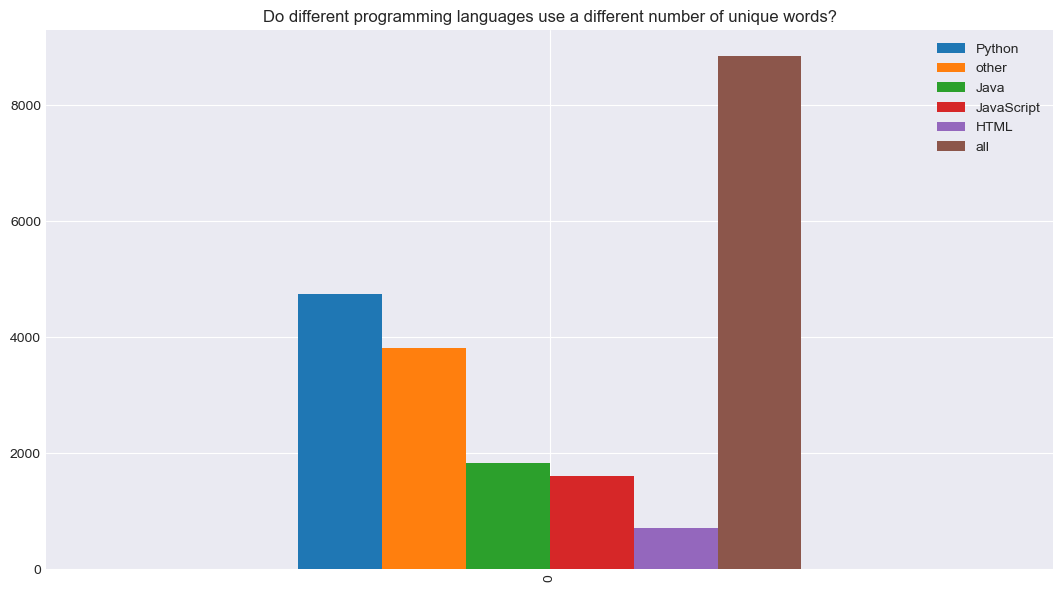

In [125]:
# do different programming languages use a different number of unique words?
one = pd.DataFrame([len(Python_words_df)])
two = pd.DataFrame([len(other_words_df)])
three = pd.DataFrame([len(Java_words_df)])
four = pd.DataFrame([len(JavaScript_words_df)])
five = pd.DataFrame([len(all_words_df)])

six = pd.DataFrame([len(HTML_words_df)])

master_numbers = pd.concat([one,two,three,four, six, five], axis=1)
master_numbers.columns = ['Python','other',  'Java', 'JavaScript', 'HTML','all',]
master_numbers.plot.bar()
plt.title('Do different programming languages use a different number of unique words?')
plt.show()

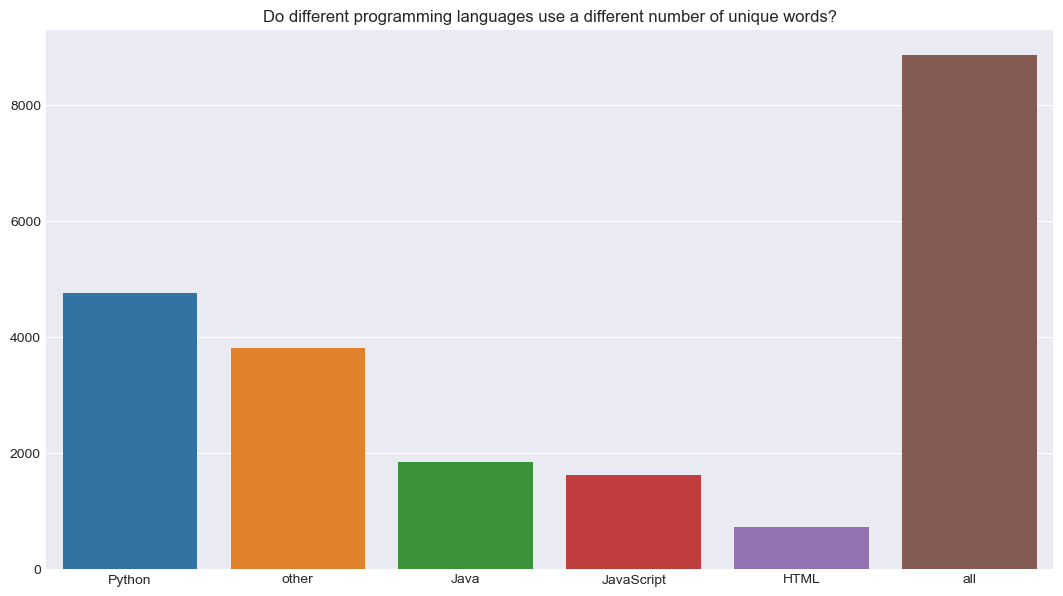

In [130]:
import seaborn as sns
sns.barplot(data = master_numbers)
plt.title('Do different programming languages use a different number of unique words?')
plt.show()

In [90]:
len(other_words_df)

3811

In [170]:
from scipy import stats
r, p = stats.pearsonr(word_counts['other'], word_counts['all'])

In [173]:
p

0.0

In [68]:
word_counts

other  Python  Java  JavaScript  HTML  all
run              150      74    67          71     2  364
data             149     197    21          12    33  412
install          103      46    38          50     0  237
use               96      66    47          23     6  238
using             94     109    47          14    19  283
...              ...     ...   ...         ...   ...  ...
parallax           0       0     0           0     1    1
scroll             0       0     0           0     1    1
enquiry            0       0     0           0     1    1
delhincr           0       0     0           0     1    1
contributorsa      0       0     0           0     1    1

[8847 rows x 6 columns]

In [ ]:
other_words = clean(' '.join(df[df.language=="other"]['lemmatized']))
Python_words = clean(' '.join(df[df.language=="Python"]['lemmatized']))
Java_words = clean(' '.join(df[df.language=="Java"]['lemmatized']))
JavaScript_words = clean(' '.join(df[df.language=="JavaScript"]['lemmatized']))
HTML_words = clean(' '.join(df[df.language=="HTML"]['lemmatized']))

<Axes: >

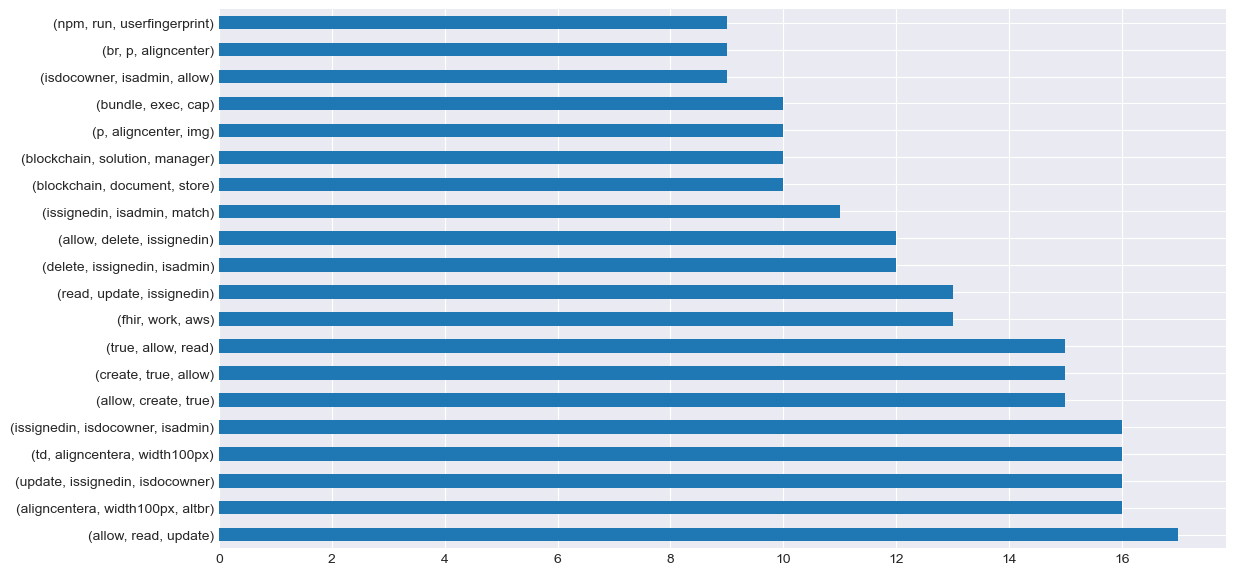

In [138]:
pd.Series(nltk.trigrams(other_words)).value_counts().head(20).plot.barh()

<Axes: >

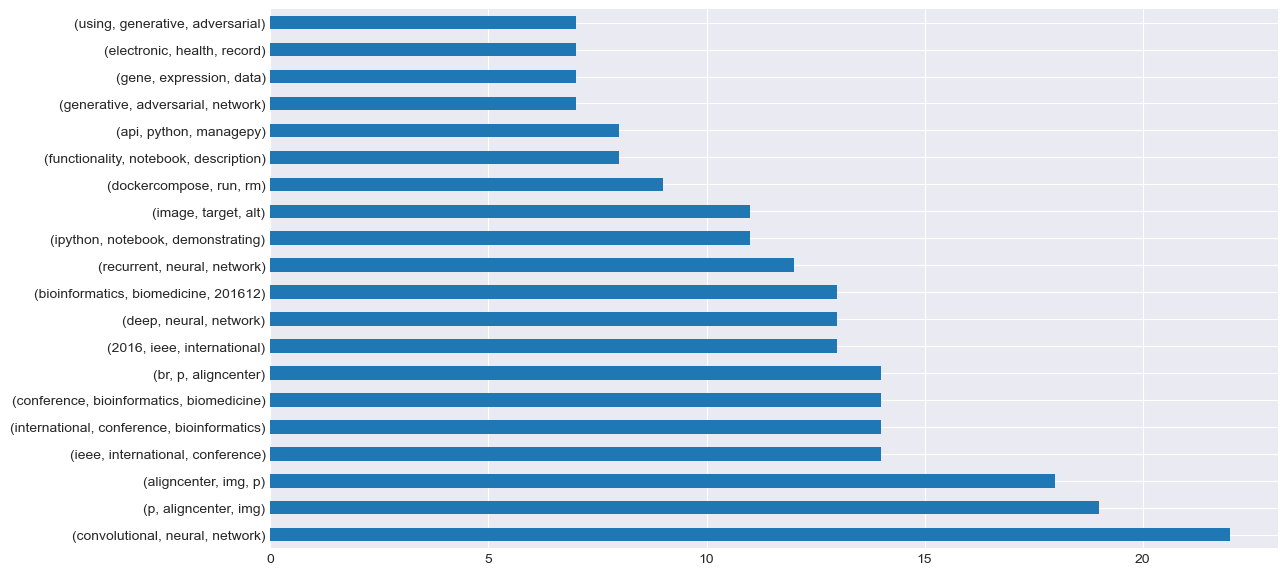

In [139]:
pd.Series(nltk.trigrams(Python_words)).value_counts().head(20).plot.barh()

<Axes: >

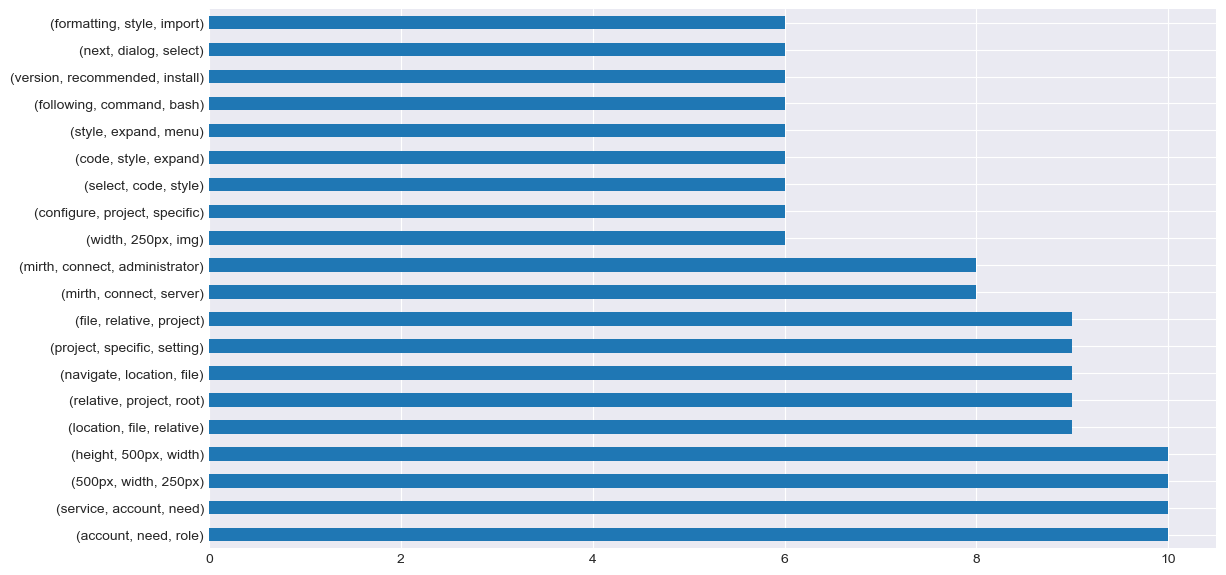

In [140]:
pd.Series(nltk.trigrams(Java_words)).value_counts().head(20).plot.barh()

<Axes: >

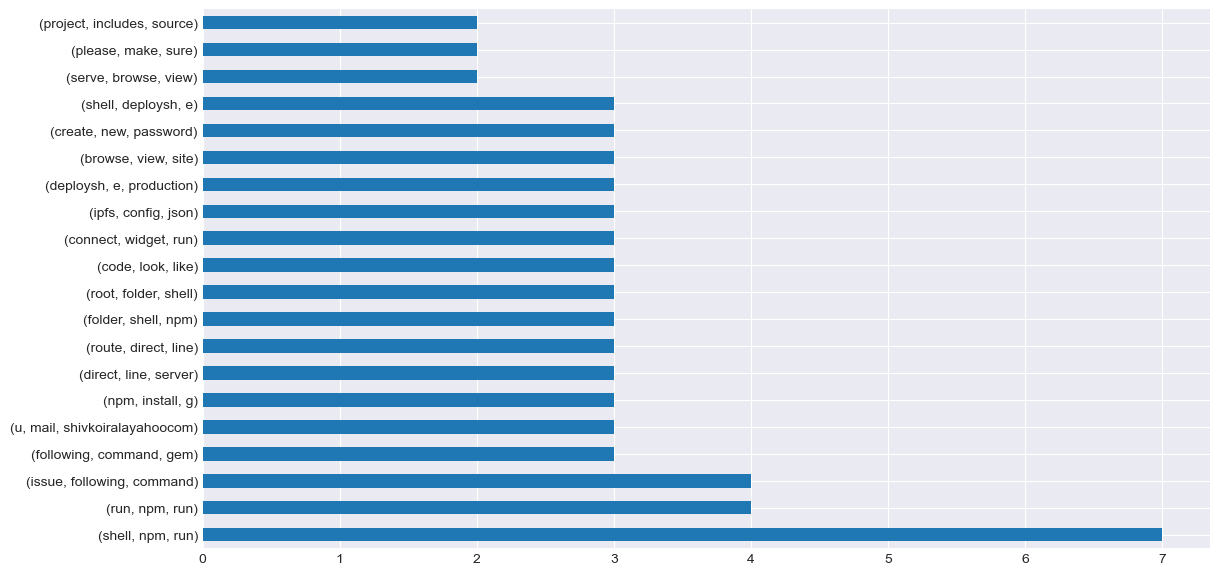

In [141]:
pd.Series(nltk.trigrams(JavaScript_words)).value_counts().head(20).plot.barh()

<Axes: >

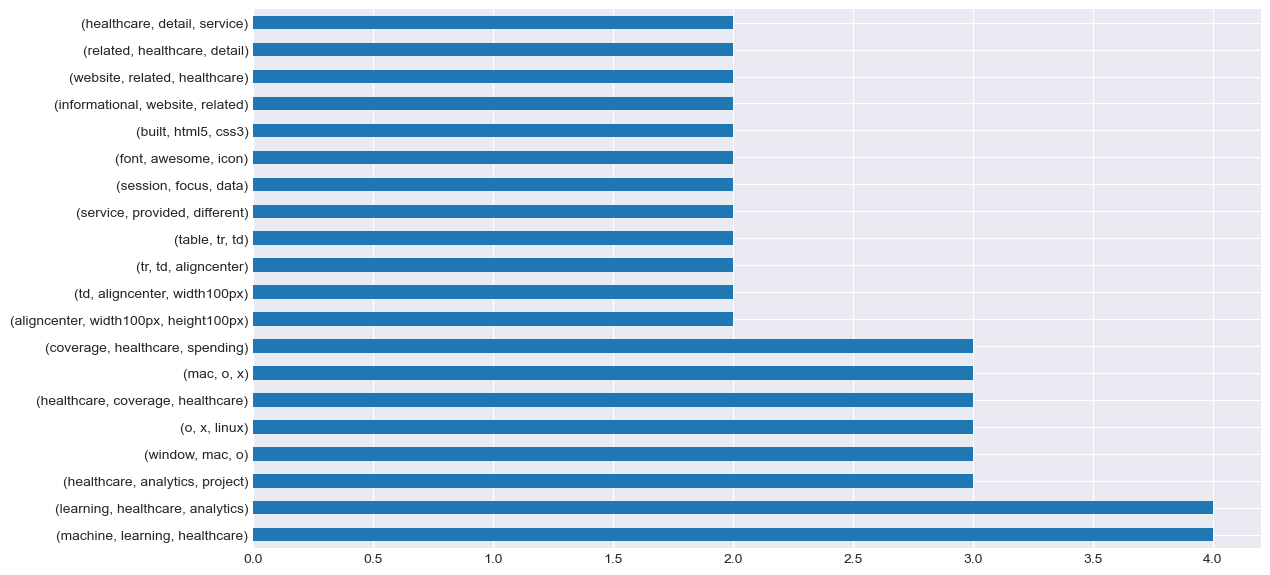

In [142]:
pd.Series(nltk.trigrams(HTML_words)).value_counts().head(20).plot.barh()

In [ ]:
(word_counts.sort_values('all', ascending=False)
.head(20)
.apply(lambda row: row/row['all'], axis=1)
.drop(columns='all')
.sort_values(by='other')
.plot.barh(stacked=True, width=1, ec='black')
)


plt.title('% of spam vs ham for the most common 20 words')
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right')
plt.show()

In [87]:
the_test = pd.Series(nltk.bigrams(other_words))

the_test = pd.DataFrame(the_test)
the_test.columns = ['all']
the_test

all
0      (flutterhealthcareapp, twitter)
1                    (twitter, github)
2                     (github, github)
3                       (github, dart)
4                       (dart, github)
...                                ...
15468                (migration, need)
15469                (need, automated)
15470           (automated, reference)
15471            (reference, database)
15472            (database, migration)

[15473 rows x 1 columns]

In [ ]:
other_words = clean(' '.join(df[df.language=="other"]['lemmatized']))
Python_words = clean(' '.join(df[df.language=="Python"]['lemmatized']))
Java_words = clean(' '.join(df[df.language=="Java"]['lemmatized']))
JavaScript_words = clean(' '.join(df[df.language=="JavaScript"]['lemmatized']))
HTML_words = clean(' '.join(df[df.language=="HTML"]['lemmatized']))


<Axes: >

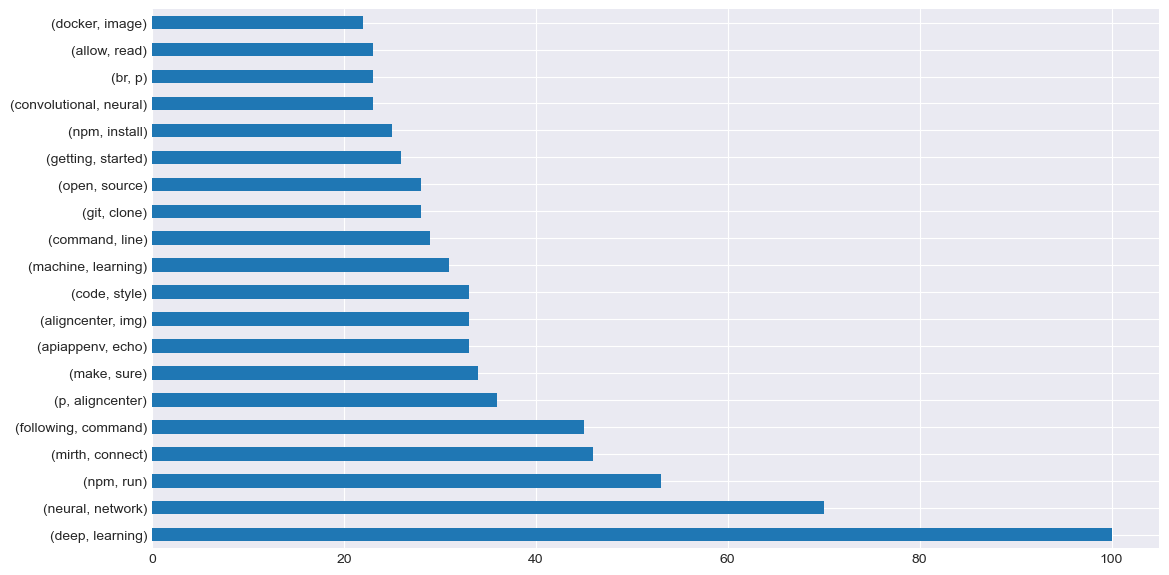

In [135]:
# what bigram words occur the most in each programming language
pd.Series(nltk.bigrams(all_words)).value_counts().head(20).plot.barh()

<Axes: >

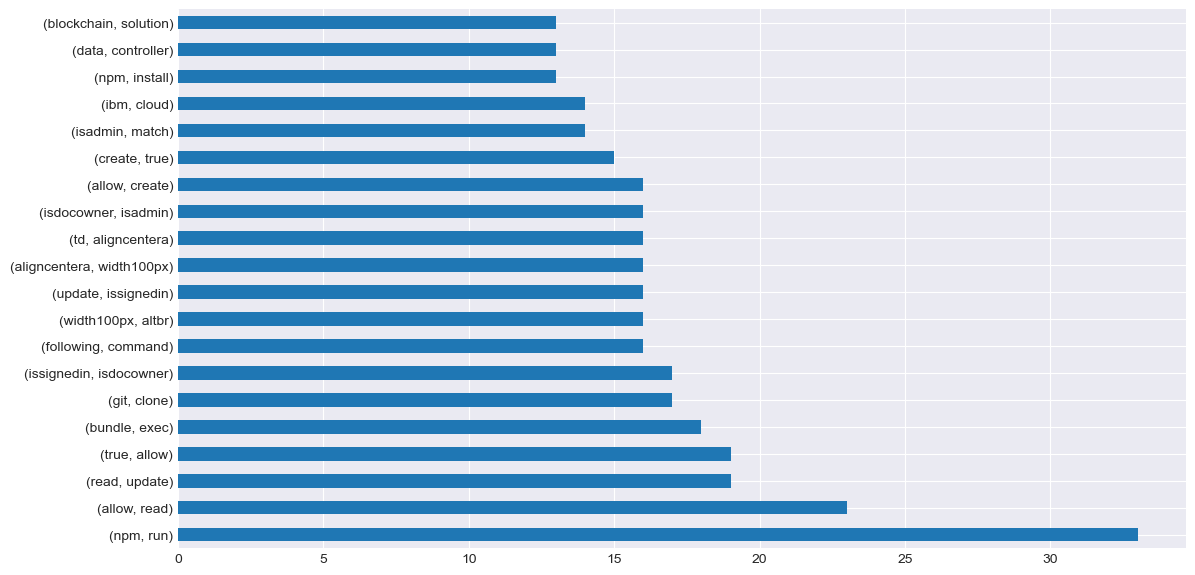

In [131]:
pd.Series(nltk.bigrams(other_words)).value_counts().head(20).plot.barh()

<Axes: >

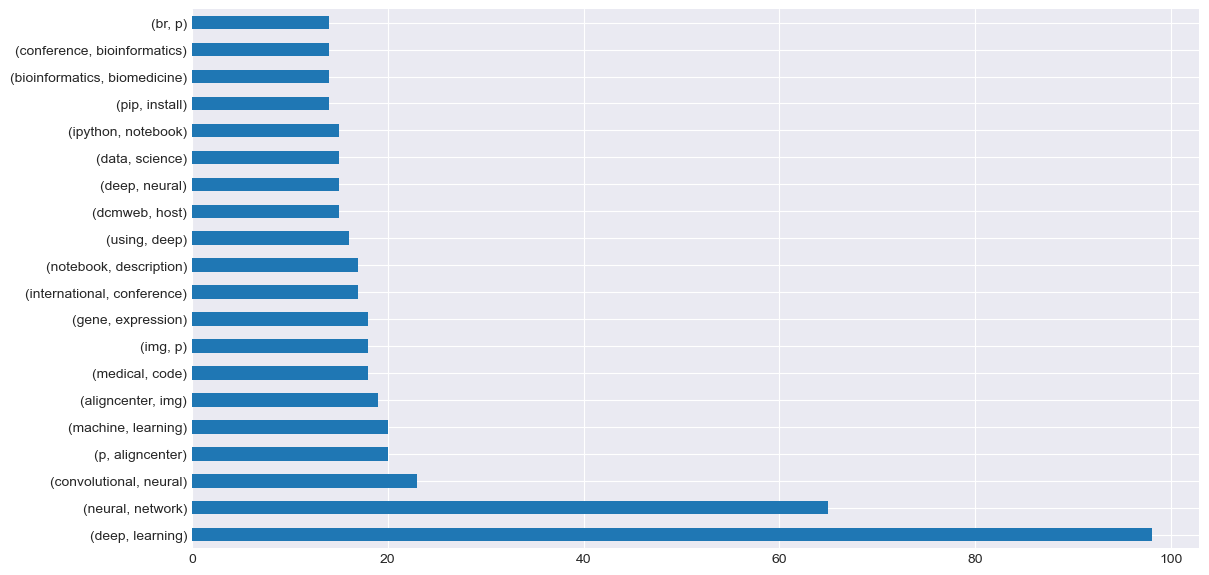

In [132]:
pd.Series(nltk.bigrams(Python_words)).value_counts().head(20).plot.barh()

<Axes: >

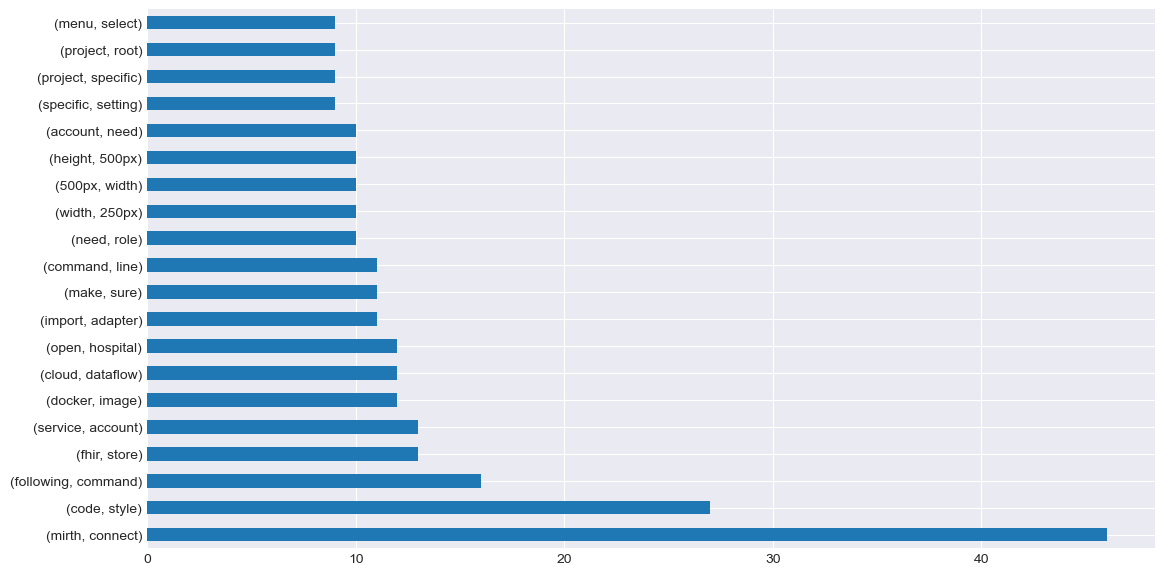

In [133]:
pd.Series(nltk.bigrams(Java_words)).value_counts().head(20).plot.barh()

<Axes: >

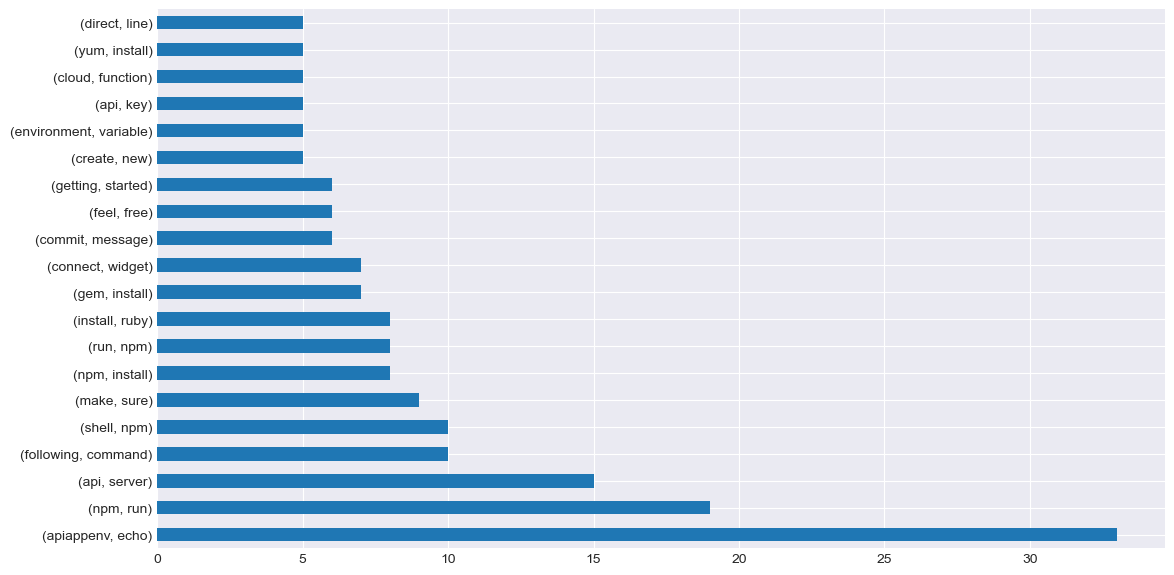

In [134]:
pd.Series(nltk.bigrams(JavaScript_words)).value_counts().head(20).plot.barh()

In [137]:
pd.Series(nltk.bigrams(HTML_words)).value_counts().head(1)
pd.Series(nltk.bigrams(JavaScript_words)).value_counts().head(1)

(apiappenv, echo)    33
dtype: int64

<Axes: >

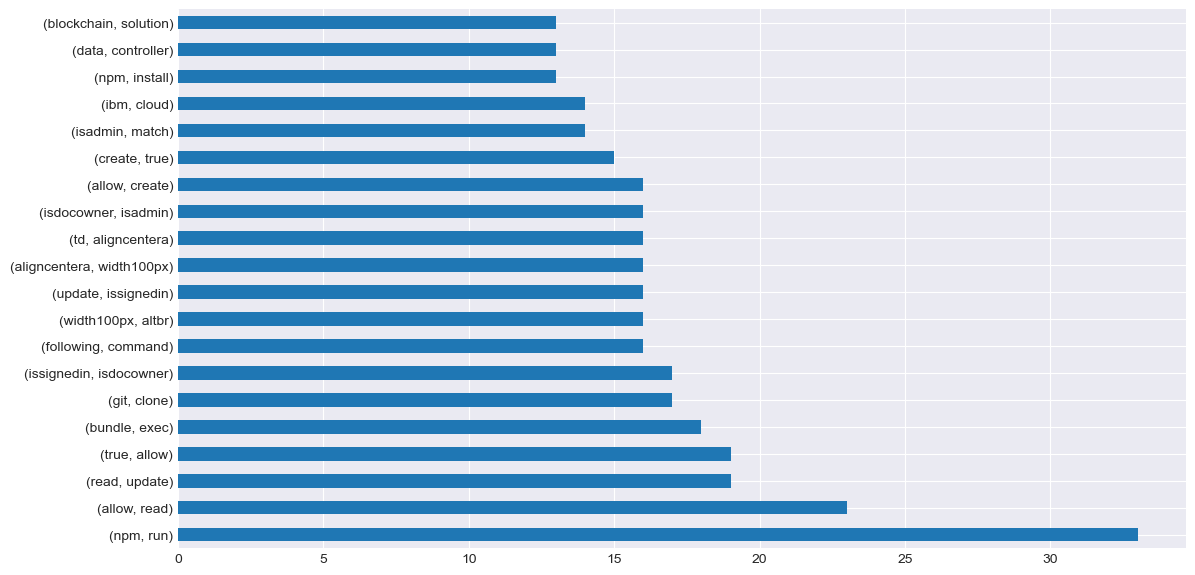

In [72]:
pd.Series(nltk.bigrams(HTML_words)).value_counts().head(20).plot.barh()

In [143]:
all_freq

data                        412
run                         364
using                       283
file                        282
use                         238
                           ... 
datapublicmddatapublicmd      1
datamd                        1
docinstallmddocinstallmd      1
3clause                       1
todos                         1
Length: 8847, dtype: int64

In [146]:
word_counts =pd.concat([other_words_freq,Python_words_freq, Java_words_freq, JavaScript_words_freq,HTML_words_freq, all_freq], axis =1).fillna(0).astype(int)

In [149]:
word_counts.columns = ['other', 'Python', 'Java', 'JavaScript', 'HTML', 'all']

In [167]:
word_counts[word_counts == word_counts.max()]
word_counts = word_counts.sort_values(by= 'all')

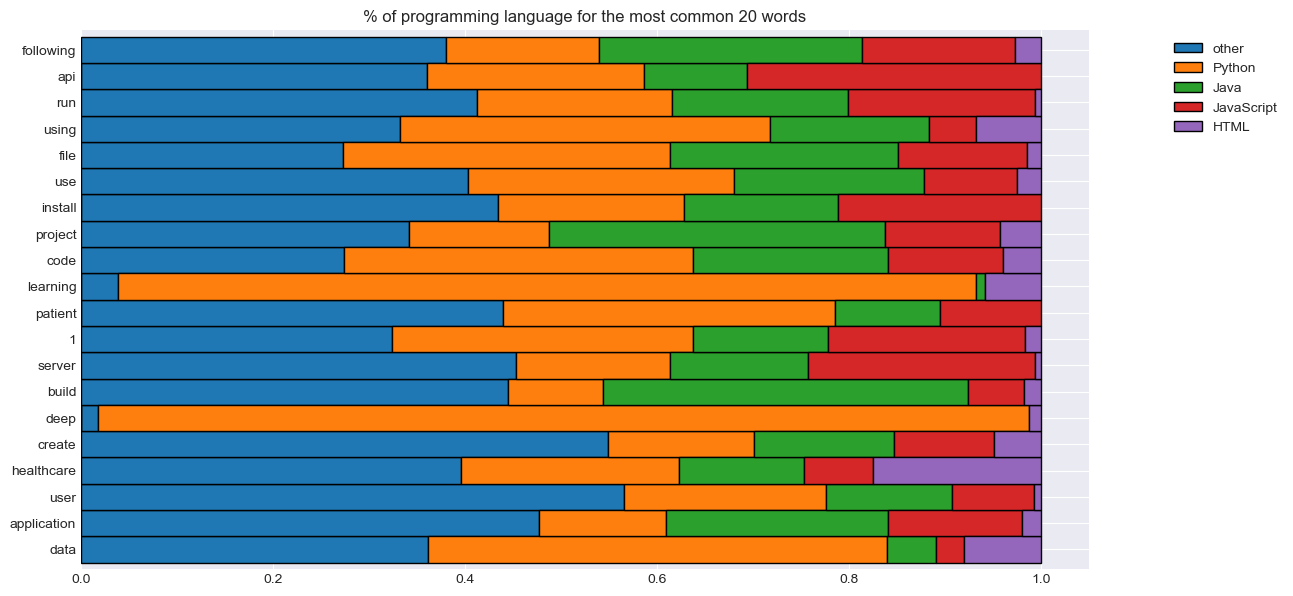

In [168]:
(word_counts.sort_values('all', ascending=False)
.head(20)
.apply(lambda row: row/row['all'], axis=1)
.sort_values(by='all')
.drop(columns='all')

.plot.barh(stacked=True, width=1, ec='black')
)


plt.title('% of programming language for the most common 20 words')
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right')
plt.show()

<Axes: >

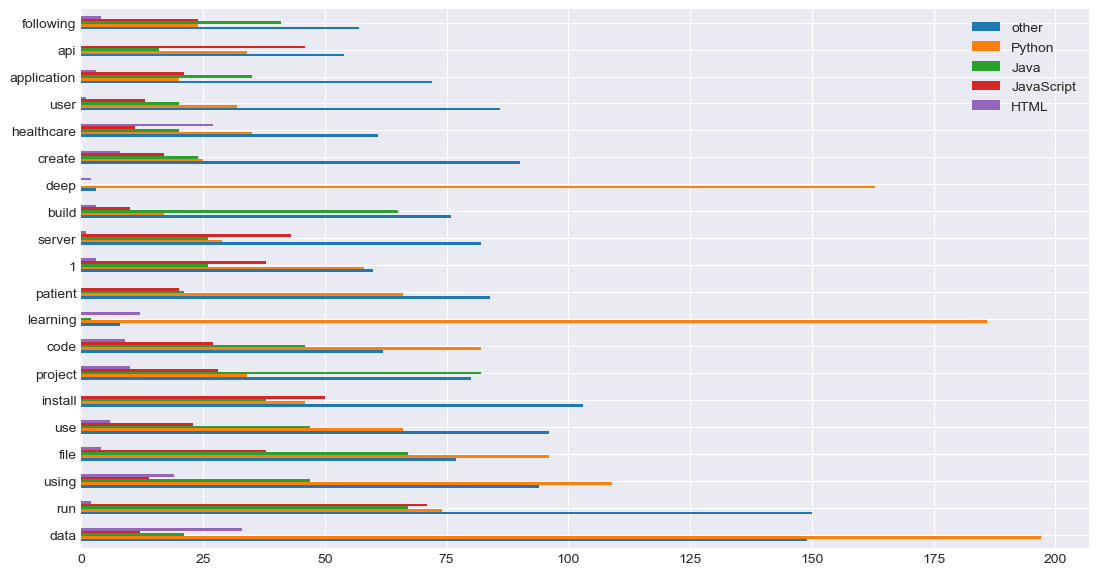

In [70]:
word_counts.sort_values('all', ascending=False)[['other', 'Python', 'Java', 'JavaScript', 'HTML']].head(20).plot.barh()

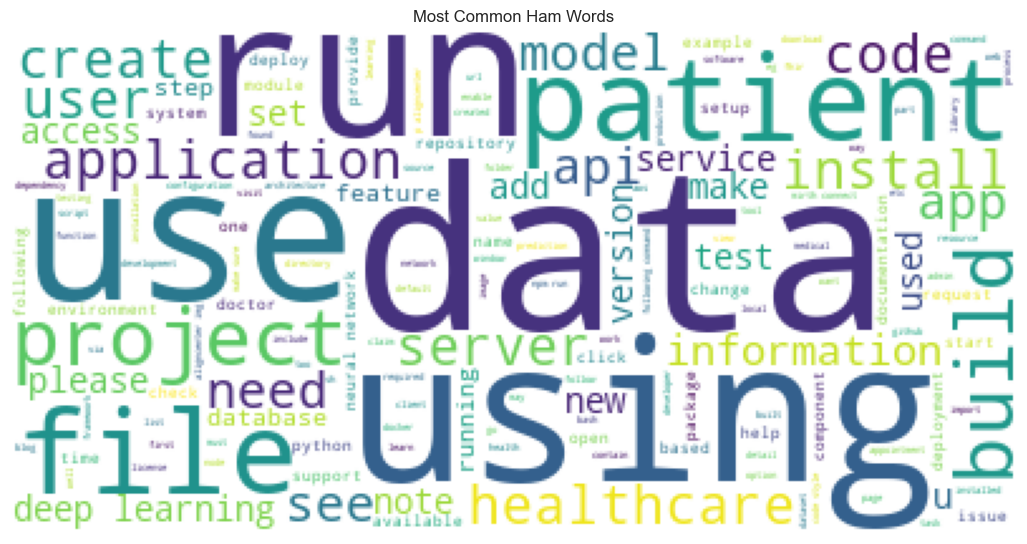

In [88]:
img = WordCloud(background_color='white').generate(' '.join(all_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

In [ ]:
word_counts = pd.concat([ham_freq]).fillna(0).astype(int)

In [37]:
(word_counts.sort_values('all', ascending=False)
.head(20)
.apply(lambda row: row/row['all'], axis=1)
.drop(columns='all')
.sort_values(by='spam')
.plot.barh(stacked=True, width=1, ec='black')
)


plt.title('% of spam vs ham for the most common 20 words')
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right')
plt.show()

NameError: name 'word_counts' is not defined